In [6]:
%matplotlib inline
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_formats = {'png', 'retina'}

# Training Data: Loaded from a text file with labels.
## Two features, x and y

In [8]:
train=pd.read_csv('synth.tr.txt', header=0, delim_whitespace=True, names=('xs', 'ys', 'yc'))

x0=np.array(train[train['yc']==0]['xs'])
y0=np.array(train[train['yc']==0]['ys'])

x1=np.array(train[train['yc']==1]['xs'])
y1=np.array(train[train['yc']==1]['ys'])

z0=np.array([x0,y0]).transpose()
z1=np.array([x1,y1]).transpose()

# Finding $\sigma$ and $\mu$ assuming Gaussian distribution for the training data.
# (Parametric classifier)

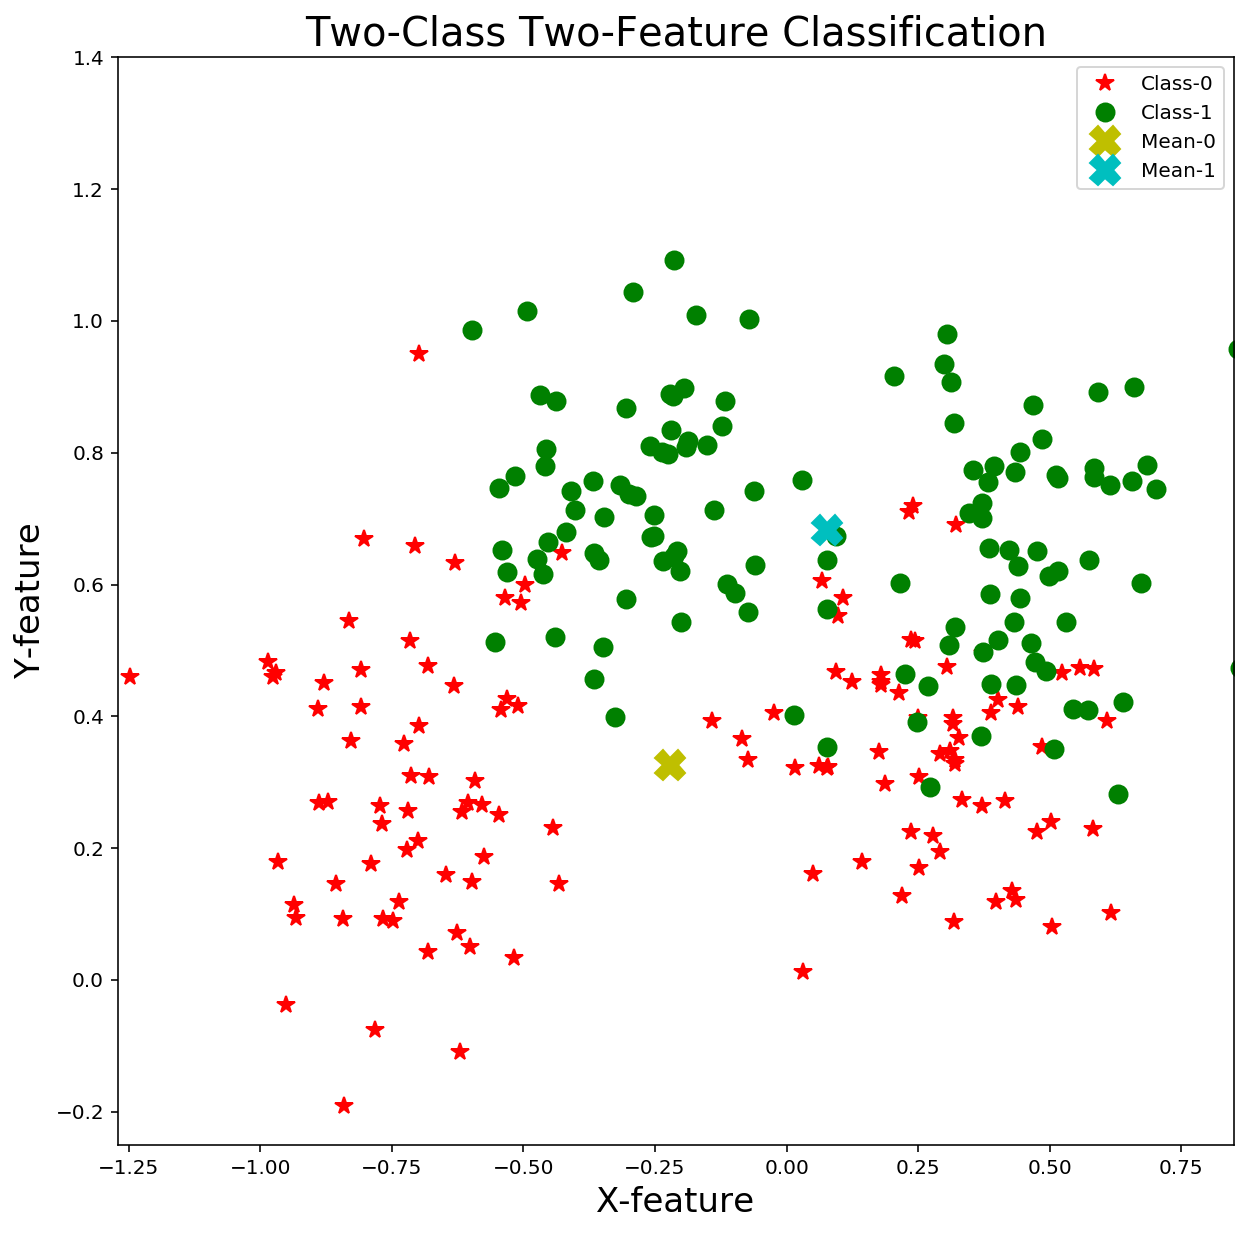

In [10]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

plt.figure(figsize=(10,10))
plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)

plt.plot(mu0[0],mu0[1],'yX',label='Mean-0', markersize=15)
plt.plot(mu1[0],mu1[1],'cX',label='Mean-1', markersize=15)

plt.ylim(-0.25,1.4)
plt.xlim(-1.27,0.85)
plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
plt.title('Two-Class Two-Feature Classification', fontsize=20)
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

# Testing Data: Loaded from a text file. Two features, x and y. Labels are for accuracy claculation

In [14]:
test=pd.read_csv('synth.te.txt', header=0, delim_whitespace=True, names=('xs', 'ys', 'yc'))
xtest=np.array(test['xs'])
ytest=np.array(test['ys'])
ztest=np.array([xtest,ytest]).transpose()

# Parameric classifier 
## Case-1 Bayesian classifier : $\Sigma_1$ = $\Sigma_2$= $\sigma^2I$

In [15]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sig=(sigma0[0,0]+sigma1[1,1])/2.0
sigma=sig*(np.identity(2, dtype=float))
sigmadet=np.linalg.det(sigma)
sigmainv=np.linalg.inv(sigma)


# Solving for the Decision Boundary in Case-1 
x=Symbol('x')
y=Symbol('y')
zz=np.array([x,y])
z=zz.reshape(1,2)

Prior=0.5
g00=-0.5*(z-mu0).reshape(1,2).dot(sigmainv).dot((z-mu0).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)
g11=-0.5*(z-mu1).reshape(1,2).dot(sigmainv).dot((z-mu1).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)

DB1=solve(g00[0][0]-g11[0][0], y)

print('The linear equation for the decision boundary in case-1:\ny='+str(DB1[0])+'\n\n')

#------------------------------------------------------------------------------------------------------------------------------

#Categorizing based on the Discriminant Function

def g0(data, Prior):
    k,l=data.shape  # k = number of training samples, l = dimension (# of features)
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigmainv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigmainv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g1

boolcase1=g0(ztest,0.5)>=g1(ztest,0.5)
boolcase1=np.array([0 if i else 1 for i in boolcase1])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-1------------------------------------------------------
testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
accu_case1=testbool+boolcase1
unique1, counts1 = np.unique(accu_case1, return_counts=True)
case1=dict(zip(unique1, counts1))

# print('Case 1 = ' + str(case1))
accuracy_case1= (counts1[0]+counts1[2])/(counts1[0]+counts1[1]+counts1[2])
print('Case 1: Overall Accuracy = ' + str(accuracy_case1))

The linear equation for the decision boundary in case-1:
y=-0.832622948392766*x + 0.44378197841356


Case 1: Overall Accuracy = 0.713


## Case-2 Bayesian classifier : $\Sigma_1$ $=$ $\Sigma_2$

In [18]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sigma=(sigma0+sigma1)/2.
sigmadet=np.linalg.det(sigma)
sigmainv=np.linalg.inv(sigma)


# Solving for the Decision Boundary in Case-3
x=Symbol('x')
y=Symbol('y')
zz=np.array([x,y])
z=zz.reshape(1,2)

Prior=0.5
g00=-0.5*(z-mu0).reshape(1,2).dot(sigmainv).dot((z-mu0).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)
g11=-0.5*(z-mu1).reshape(1,2).dot(sigmainv).dot((z-mu1).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)

DB2=solve(g00[0][0]-g11[0][0], y)

print('The linear equation for the decision boundary in case-2:\ny='+str(DB2[0])+'\n\n')

#Categorizing based on the Discriminant Function

def g0(data, Prior):
    k,l=data.shape
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigmainv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigmainv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g1

boolcase2=g0(ztest,0.5) >= g1(ztest,0.5)
boolcase2=np.array([0 if i else 1 for i in boolcase2])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-3------------------------------------------------------
testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
accu_case2=testbool+boolcase2
unique2, counts2 = np.unique(accu_case2, return_counts=True)
case2=dict(zip(unique2, counts2))

# print('Case 2 = ' + str(case2))
accuracy_case2= (counts2[0]+counts2[2])/(counts2[0]+counts2[1]+counts2[2])
print('Case 2: Overall Accuracy = ' + str(accuracy_case2))

The linear equation for the decision boundary in case-2:
y=-0.134864086623903*x + 0.494549490884199


Case 2: Overall Accuracy = 0.892


## Case-3 Bayesian classifier : $\Sigma_1$ $\neq$ $\Sigma_2$

In [17]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sigma0det=np.linalg.det(sigma0)
sigma1det=np.linalg.det(sigma1)
sigma0inv=np.linalg.inv(sigma0)
sigma1inv=np.linalg.inv(sigma1)

# Solving for the Decision Boundary in Case-3
x=Symbol('x')
y=Symbol('y')
zz=np.array([x,y])
z=zz.reshape(1,2)

Prior=0.5
g00=-0.5*(z-mu0).reshape(1,2).dot(sigma0inv).dot((z-mu0).reshape(2,1))-0.5*np.log(sigma0det)+np.log(Prior)
g11=-0.5*(z-mu1).reshape(1,2).dot(sigma1inv).dot((z-mu1).reshape(2,1))-0.5*np.log(sigma1det)+np.log(Prior)

DB3=solve(g00[0][0]-g11[0][0], y)

print('The linear equation for the decision boundary in case-3:\ny='+str(DB3[0])+'\n\n')

#Categorizing based on the Discriminant Function

def g0(data, Prior):
    k,l=data.shape
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigma0inv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigma0det)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigma1inv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigma1det)+np.log(Prior)
    return g1


boolcase3=g0(ztest,0.5)>=g1(ztest,0.5) # True if the sample belongs to class-0, False otherwise
boolcase3=np.array([0 if i else 1 for i in boolcase3])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-3------------------------------------------------------
testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
accu_case3=testbool+boolcase3
unique3, counts3 = np.unique(accu_case3, return_counts=True)
case3=dict(zip(unique3, counts3))

# print('Case 3 = ' + str(case3))
accuracy_case3= (counts3[0]+counts3[2])/(counts3[0]+counts3[1]+counts3[2])
print('Case 3: Overall Accuracy = ' + str(accuracy_case3))

The linear equation for the decision boundary in case-3:
y=-0.641052306096743*x - 8.91426865585982e-25*sqrt(-1.51514382948643e+45*x**2 - 1.95123755461517e+48*x + 3.25462873130337e+48) + 2.09052329406855


Case 3: Overall Accuracy = 0.898


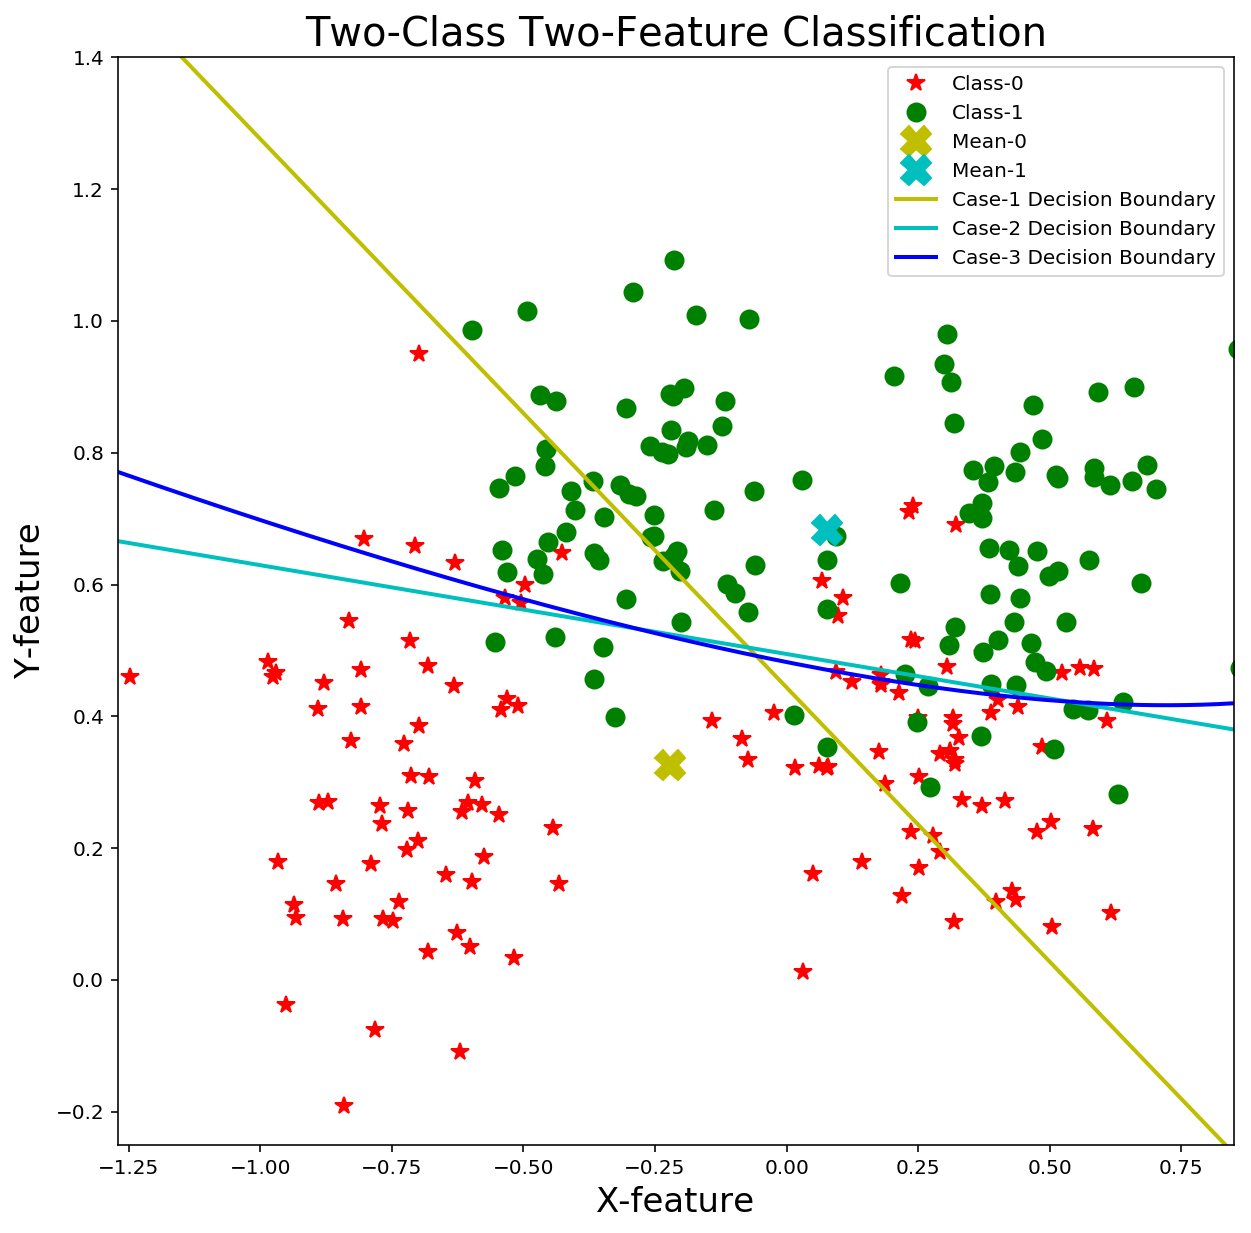

In [19]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

plt.figure(figsize=(10,10))
plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)

plt.plot(mu0[0],mu0[1],'yX',label='Mean-0', markersize=15)
plt.plot(mu1[0],mu1[1],'cX',label='Mean-1', markersize=15)

xmin, xmax=np.min(np.array(train['xs'])), np.max(np.array(train['xs']))

xplot=np.arange(-1.27, 0.86, 0.01)
# xplot=np.arange(xmin, xmax, 0.01)

plt.plot(xplot, -0.832622948392766*xplot + 0.44378197841356, 'y-', linewidth=2, label='Case-1 Decision Boundary')
plt.plot(xplot, -0.134864086623903*xplot + 0.494549490884199, 'c-', linewidth=2, label='Case-2 Decision Boundary')
plt.plot(xplot, -0.641052306096743*xplot - 8.91426865585982e-25*np.sqrt(-1.51514382948643e+45*(xplot**2) - 1.95123755461517e+48*xplot + 3.25462873130337e+48) + 2.09052329406855, 'b-', linewidth=2, label='Case-3 Decision Boundary')

plt.ylim(-0.25,1.4)
plt.xlim(-1.27,0.85)
plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
plt.title('Two-Class Two-Feature Classification', fontsize=20)
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

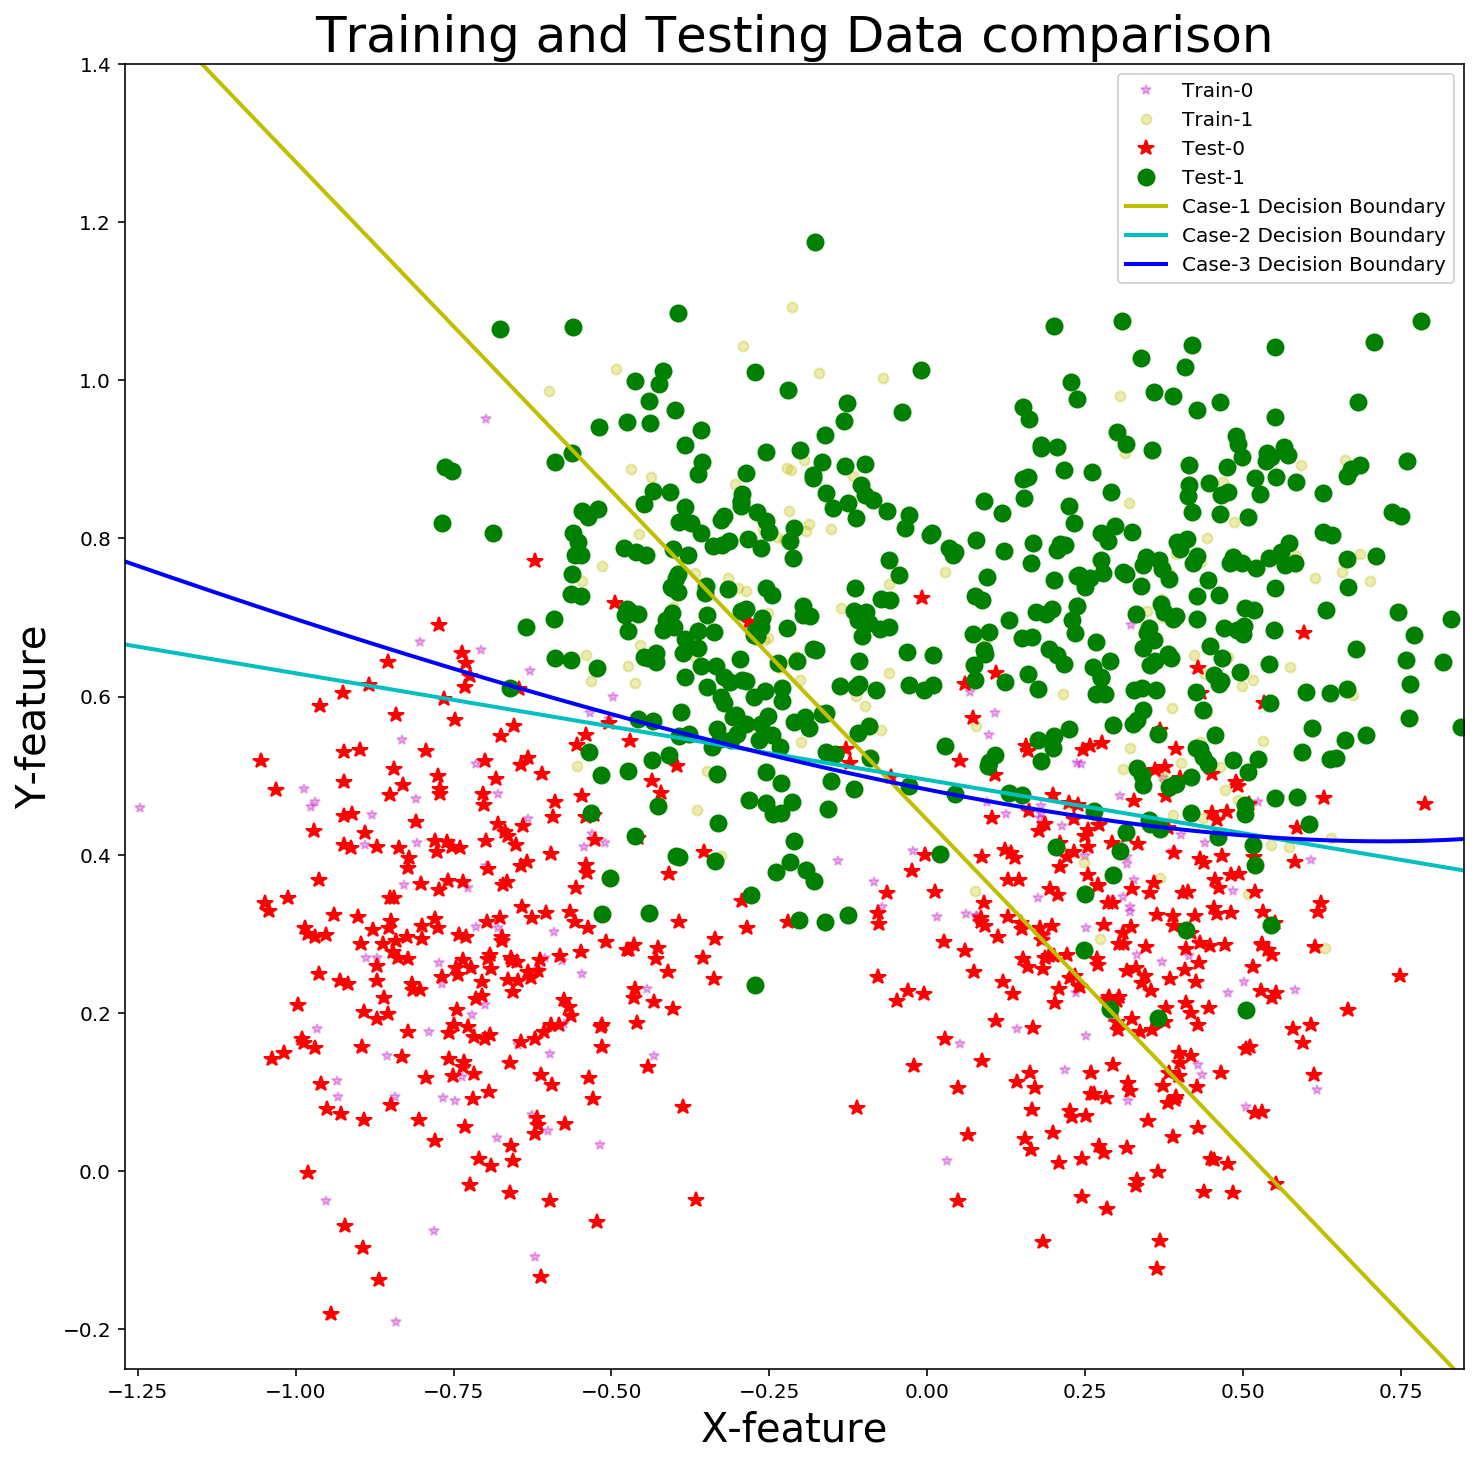

In [20]:
testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.

#------------------------------------------
xtest0=np.array(test[test['yc']==0]['xs'])#
ytest0=np.array(test[test['yc']==0]['ys'])#
                                          #
xtest1=np.array(test[test['yc']==1]['xs'])#
ytest1=np.array(test[test['yc']==1]['ys'])#
#------------------------------------------

plt.figure(figsize=(12,12))
plt.plot(x0,y0,'m*', alpha= 0.3, label='Train-0', markersize=5)
plt.plot(x1,y1,'yo', alpha= 0.3, label='Train-1', markersize=5)
plt.plot(xtest0,ytest0,'r*', label='Test-0', markersize=8)
plt.plot(xtest1,ytest1,'go', label='Test-1', markersize=8)

xmin, xmax=np.min(np.array(train['xs'])), np.max(np.array(train['xs']))

xplot=np.arange(-1.27, 0.86, 0.01)
# xplot=np.arange(xmin, xmax, 0.01)
plt.plot(xplot, -0.832622948392766*xplot + 0.44378197841356, 'y-', linewidth=2, label='Case-1 Decision Boundary')
plt.plot(xplot, -0.134864086623903*xplot + 0.494549490884199, 'c-', linewidth=2, label='Case-2 Decision Boundary')
plt.plot(xplot, -0.641052306096743*xplot - 8.91426865585982e-25*np.sqrt(-1.51514382948643e+45*(xplot**2) - 1.95123755461517e+48*xplot + 3.25462873130337e+48) + 2.09052329406855, 'b-', linewidth=2, label='Case-3 Decision Boundary')

plt.ylim(-0.25,1.4)
plt.xlim(-1.27,0.85)
plt.xlabel('X-feature', fontsize=20)
plt.ylabel('Y-feature', fontsize=20)
plt.title('Training and Testing Data comparison', fontsize=25)
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

## Overall Accuracy Calculation

In [21]:
testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.

accu_case1=testbool+boolcase1
accu_case2=testbool+boolcase2
accu_case3=testbool+boolcase3

unique1, counts1 = np.unique(accu_case1, return_counts=True)
case1=dict(zip(unique1, counts1))

unique2, counts2 = np.unique(accu_case2, return_counts=True)
case2=dict(zip(unique2, counts2))

unique3, counts3 = np.unique(accu_case3, return_counts=True)
case3=dict(zip(unique3, counts3))

# print('Case 1 = ' + str(case1) + '\n' + 'Case 2 = ' + str(case2) + '\n'+ 'Case 3 = ' + str(case3))

accuracy_case1= (counts1[0]+counts1[2])/(counts1[0]+counts1[1]+counts1[2])
accuracy_case2= (counts2[0]+counts2[2])/(counts2[0]+counts2[1]+counts2[2])
accuracy_case3= (counts3[0]+counts3[2])/(counts3[0]+counts3[1]+counts3[2])

print('Case 1: Overall Accuracy = ' + str(accuracy_case1) + '\n' + 'Case 2: Overall Accuracy = ' + str(accuracy_case2) + '\n'+ 'Case 3: Overall Accuracy = ' + str(accuracy_case3))

Case 1: Overall Accuracy = 0.713
Case 2: Overall Accuracy = 0.892
Case 3: Overall Accuracy = 0.898


## Classwise Accuracy Calculation

In [22]:
testbool0=np.array(test['yc'])[:500]     # This is used to calculate the accuracy by comparing this with the different case discriminants.
testbool1=np.array(test['yc'])[500:1000] # This is used to calculate the accuracy by comparing this with the different case discriminants.

boolcase10=boolcase1[0:500]
boolcase11=boolcase1[500:1000]

accu_case10=testbool0+boolcase10
accu_case11=testbool1+boolcase11

boolcase20=boolcase2[0:500]
boolcase21=boolcase2[500:1000]

accu_case20=testbool0+boolcase20
accu_case21=testbool1+boolcase21

boolcase30=boolcase3[0:500]
boolcase31=boolcase3[500:1000]

accu_case30=testbool0+boolcase30
accu_case31=testbool1+boolcase31

unique10, counts10 = np.unique(accu_case10, return_counts=True)
case10=dict(zip(unique10, counts10))

unique11, counts11 = np.unique(accu_case11, return_counts=True)
case11=dict(zip(unique11, counts11))


unique20, counts20 = np.unique(accu_case20, return_counts=True)
case20=dict(zip(unique20, counts20))

unique21, counts21 = np.unique(accu_case21, return_counts=True)
case21=dict(zip(unique21, counts21))


unique30, counts30 = np.unique(accu_case30, return_counts=True)
case30=dict(zip(unique30, counts30))

unique31, counts31 = np.unique(accu_case31, return_counts=True)
case31=dict(zip(unique31, counts31))

# print('Case 01 = ' + str(case01) + '\n' + 'Case 2 = ' + str(case2) + '\n'+ 'Case 3 = ' + str(case3))

accuracy_case10= counts10[0]/(counts10[0]+counts10[1])
accuracy_case11= counts11[1]/(counts11[0]+counts11[1])

accuracy_case20= (counts20[0])/(counts20[0]+counts20[1])
accuracy_case21= (counts21[1])/(counts21[0]+counts21[1])

accuracy_case30= (counts30[0])/(counts30[0]+counts30[1])
accuracy_case31= (counts31[1])/(counts31[0]+counts31[1])


print('Total accuracy of case 1 = '+ str(accuracy_case1)+'\n')
print('Class-wise accuracy of case 1\n  '+ 'Class-0 accuracy of case 1 = '+ str(accuracy_case10)+ '\n  '  + 'Class-1 accuracy of case 1 = '+ str(accuracy_case11)+'\n')

print('Total accuracy of case 2 = '+ str(accuracy_case2)+'\n')
print('Class-wise accuracy of case 2\n  '+ 'Class-0 accuracy of case 2 = '+ str(accuracy_case20)+ '\n  '  + 'Class-1 accuracy of case 2 = '+ str(accuracy_case21)+'\n')

print('Total accuracy of case 3 = '+ str(accuracy_case3)+'\n')
print('Class-wise accuracy of case 3\n  '+ 'Class-0 accuracy of case 3 = '+ str(accuracy_case30)+ '\n  '  + 'Class-1 accuracy of case 3 = '+ str(accuracy_case31))

Total accuracy of case 1 = 0.713

Class-wise accuracy of case 1
  Class-0 accuracy of case 1 = 0.68
  Class-1 accuracy of case 1 = 0.746

Total accuracy of case 2 = 0.892

Class-wise accuracy of case 2
  Class-0 accuracy of case 2 = 0.9
  Class-1 accuracy of case 2 = 0.884

Total accuracy of case 3 = 0.898

Class-wise accuracy of case 3
  Class-0 accuracy of case 3 = 0.908
  Class-1 accuracy of case 3 = 0.888


# Performance Analysis of Bayesian Classifier for Three Cases
## Case-1

<Figure size 432x288 with 0 Axes>

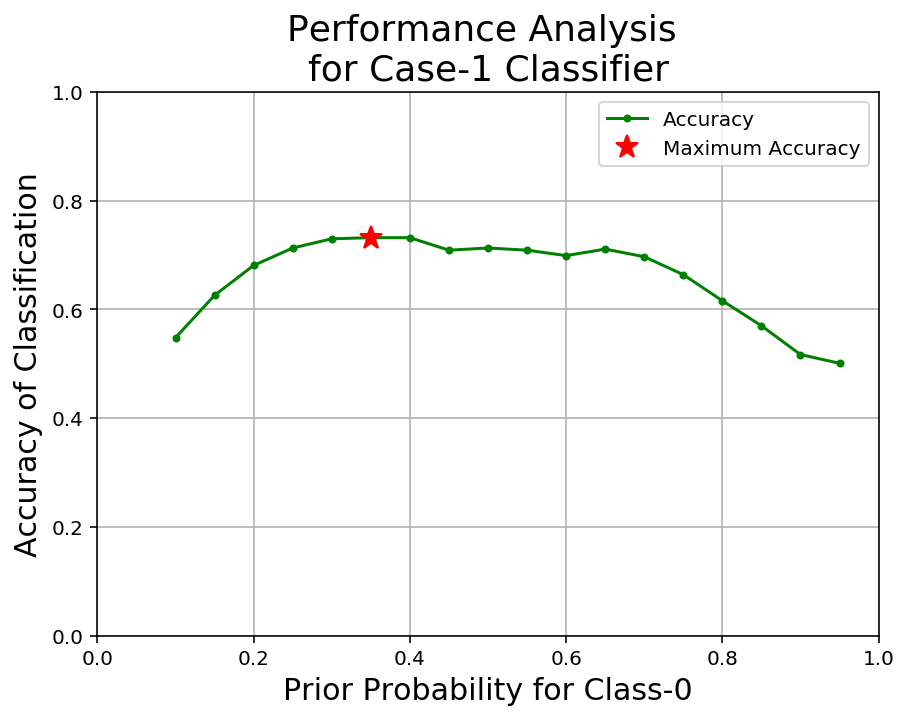

In [23]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sig=(sigma0[0,0]+sigma1[1,1])/2.0
sigma=sig*(np.identity(2, dtype=float))
sigmadet=np.linalg.det(sigma)
sigmainv=np.linalg.inv(sigma)

#------------Categorizing based on the Discriminant Function-----------

def g0(data, Prior):
    k,l=data.shape  # k = number of training samples, l = dimension (# of features)
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigmainv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigmainv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g1

#------------------------------------Accuracy as a function of prior values------------------------------------------------
perfo_case1=[]
pri=np.arange(0.1, 1., 0.05)
for prior in pri:
    boolcase1=g0(ztest,prior)>=g1(ztest,1.0-prior)
    boolcase1=np.array([0 if i else 1 for i in boolcase1])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-1------------------------------------------------------
    testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
    accu_case1=testbool+boolcase1
    unique1, counts1 = np.unique(accu_case1, return_counts=True)
    case1=dict(zip(unique1, counts1))
    accuracy_case1= (counts1[0]+counts1[2])/(counts1[0]+counts1[1]+counts1[2])
    perfo_case1.append(accuracy_case1)

plt.figure(1)
plt.figure(figsize=(7,5))
plt.plot(pri, perfo_case1,'g.-', label='Accuracy')
plt.plot(pri[np.argmax(perfo_case1)], np.max(perfo_case1),'r*', label='Maximum Accuracy', markersize=12)
plt.ylim(0,1.)
plt.xlim(0,1.)
plt.grid(True)
plt.xlabel('Prior Probability for Class-0', fontsize=15)
plt.ylabel('Accuracy of Classification', fontsize=15)
plt.title('Performance Analysis \nfor Case-1 Classifier', fontsize=18)
plt.legend(loc='upper right')
plt.show()

## Case-2

<Figure size 432x288 with 0 Axes>

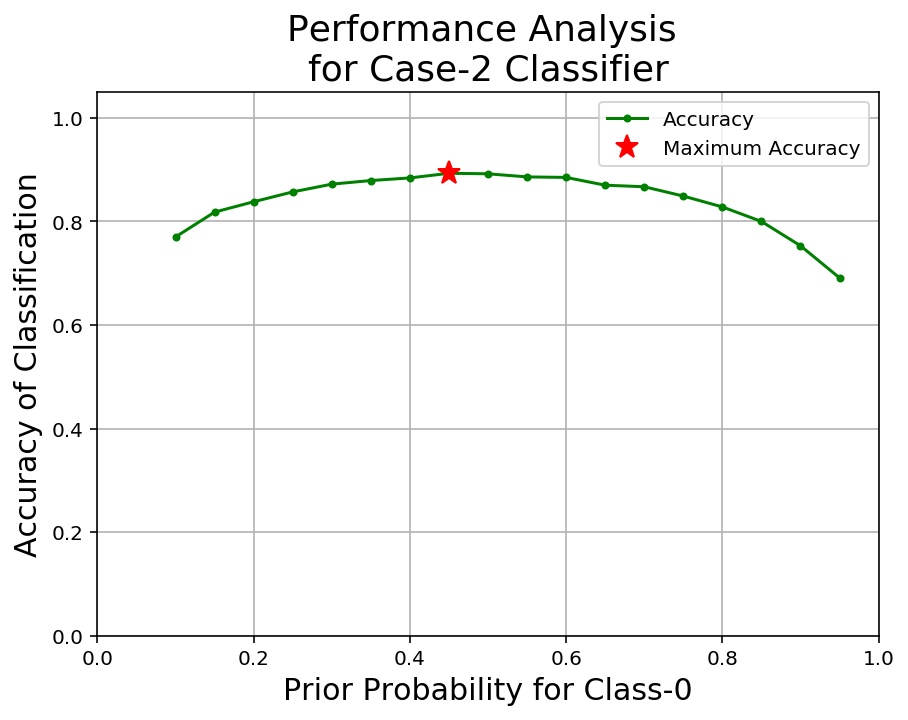

In [24]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sigma=(sigma0+sigma1)/2.
sigmadet=np.linalg.det(sigma)
sigmainv=np.linalg.inv(sigma)

#Categorizing based on the Discriminant Function

def g0(data, Prior):
    k,l=data.shape
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigmainv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigmainv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigmadet)+np.log(Prior)
    return g1

#------------------------------------Accuracy as a function of prior values------------------------------------------------
perfo_case2=[]
pri=np.arange(0.1, 1., 0.05)
for prior in pri:
    boolcase2=g0(ztest, prior) >= g1(ztest, 1.0-prior)
    boolcase2=np.array([0 if i else 1 for i in boolcase2])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-3------------------------------------------------------
    testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
    accu_case2=testbool+boolcase2
    unique2, counts2 = np.unique(accu_case2, return_counts=True)
    case2=dict(zip(unique2, counts2))
    accuracy_case2= (counts2[0]+counts2[2])/(counts2[0]+counts2[1]+counts2[2])
    perfo_case2.append(accuracy_case2)
    
plt.figure(1)
plt.figure(figsize=(7,5))
plt.plot(pri, perfo_case2,'g.-', label='Accuracy')
plt.plot(pri[np.argmax(perfo_case2)], np.max(perfo_case2),'r*', label='Maximum Accuracy', markersize=12)
plt.ylim(0.,1.05)
plt.xlim(0,1.)
plt.grid(True)
plt.xlabel('Prior Probability for Class-0', fontsize=15)
plt.ylabel('Accuracy of Classification', fontsize=15)
plt.title('Performance Analysis \nfor Case-2 Classifier', fontsize=18)
plt.legend(loc='upper right')
plt.show()

## Case-3

<Figure size 432x288 with 0 Axes>

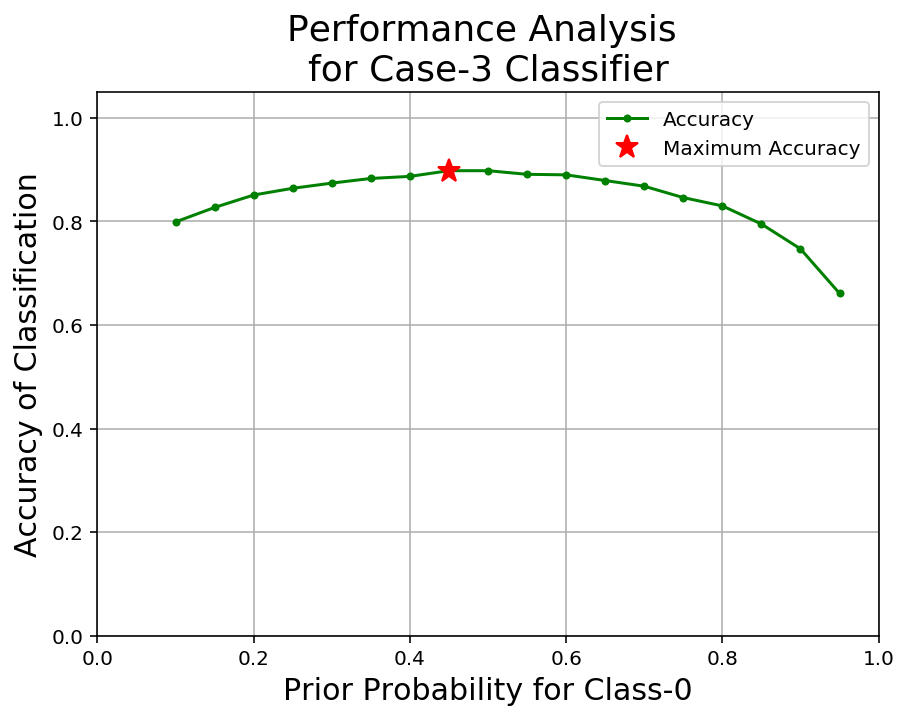

In [14]:
def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu0,sigma0=EstGauss(z0)
mu1,sigma1=EstGauss(z1)

sigma0det=np.linalg.det(sigma0)
sigma1det=np.linalg.det(sigma1)
sigma0inv=np.linalg.inv(sigma0)
sigma1inv=np.linalg.inv(sigma1)

#Categorizing based on the Discriminant Function

def g0(data, Prior):
    k,l=data.shape
    g0=np.zeros(k)
    for i in range(k):
        g0[i]=-0.5*(data[i]-mu0).reshape(1,l).dot(sigma0inv).dot((data[i]-mu0).reshape(l,1))-0.5*np.log(sigma0det)+np.log(Prior)
    return g0

def g1(data, Prior):
    k,l=data.shape
    g1=np.zeros(k)
    for i in range(k):
        g1[i]=-0.5*(data[i]-mu1).reshape(1,l).dot(sigma1inv).dot((data[i]-mu1).reshape(l,1))-0.5*np.log(sigma1det)+np.log(Prior)
    return g1

#------------------------------------Accuracy as a function of prior values------------------------------------------------
perfo_case3=[]
pri=np.arange(0.1, 1., 0.05)
for prior in pri:
    boolcase3=g0(ztest, prior)>=g1(ztest, 1.0-prior) # True if the sample belongs to class-0, False otherwise
    boolcase3=np.array([0 if i else 1 for i in boolcase3])  # Converting the True to zero and False to 1.

#-----------------------------------Accuracy Calculation for Case-3------------------------------------------------------
    testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.
    accu_case3=testbool+boolcase3
    unique3, counts3 = np.unique(accu_case3, return_counts=True)
    case3=dict(zip(unique3, counts3))
    accuracy_case3= (counts3[0]+counts3[2])/(counts3[0]+counts3[1]+counts3[2])
    perfo_case3.append(accuracy_case3)
    

plt.figure(1)
plt.figure(figsize=(7,5))
plt.plot(pri, perfo_case3,'g.-', label='Accuracy')
plt.plot(pri[np.argmax(perfo_case3)], np.max(perfo_case3),'r*', label='Maximum Accuracy', markersize=12)
plt.ylim(0.,1.05)
plt.xlim(0,1.)
plt.grid(True)
plt.xlabel('Prior Probability for Class-0', fontsize=15)
plt.ylabel('Accuracy of Classification', fontsize=15)
plt.title('Performance Analysis \nfor Case-3 Classifier', fontsize=18)
plt.legend(loc='upper right')
plt.show()

## Assuming a Two-Modal Gaussian to estimate parameters

In [25]:
mu01,sigma01= np.array([-0.75,  0.2]), np.array([[0.25, 0.], [0., 0.3]])
mu02,sigma02= np.array([0.3,  0.3]), np.array([[0.1, 0.], [0., 0.15]])
mu11,sigma11= np.array([-0.3,  0.78]), np.array([[0.1, 0.], [0., 0.15]])
mu12,sigma12= np.array([0.4,  0.65]), np.array([[0.25, 0.], [0., 0.3]])

sigma01det=np.linalg.det(sigma01)
sigma11det=np.linalg.det(sigma11)
sigma01inv=np.linalg.inv(sigma01)
sigma11inv=np.linalg.inv(sigma11)

sigma02det=np.linalg.det(sigma02)
sigma12det=np.linalg.det(sigma12)
sigma02inv=np.linalg.inv(sigma02)
sigma12inv=np.linalg.inv(sigma12)

#Categorizing based on the Discriminant Function

def gmodal_0(data, Prior):
    k,l=data.shape
    gmodal_0=np.zeros(k)
    for i in range(k):
        modal_01=(1/(2.0*np.pi))*(1/sigma01det)**0.5*np.exp(-0.5*(data[i]-mu01).reshape(1,2).dot(sigma01inv).dot((data[i]-mu01).reshape(2,1)))
        modal_02=(1/(2.0*np.pi))*(1/sigma02det)**0.5*np.exp(-0.5*(data[i]-mu02).reshape(1,2).dot(sigma02inv).dot((data[i]-mu02).reshape(2,1)))
        twomodal_0=modal_01+modal_02
        gmodal_0[i]=np.log(twomodal_0)+np.log(Prior)
    return gmodal_0

def gmodal_1(data, Prior):
    k,l=data.shape
    gmodal_1=np.zeros(k)
    for i in range(k):
        modal_11=(1/(2.0*np.pi))*(1/sigma11det)**0.5*np.exp(-0.5*(data[i]-mu11).reshape(1,2).dot(sigma11inv).dot((data[i]-mu11).reshape(2,1)))
        modal_12=(1/(2.0*np.pi))*(1/sigma12det)**0.5*np.exp(-0.5*(data[i]-mu12).reshape(1,2).dot(sigma12inv).dot((data[i]-mu12).reshape(2,1)))
        twomodal_1=modal_11+modal_12
        gmodal_1[i]=np.log(twomodal_1)+np.log(Prior)
    return gmodal_1

bimodalboolcase=gmodal_0(ztest,0.5)>=gmodal_1(ztest,0.5) # True if the sample belongs to class-0, False otherwise
bimodalboolcase=np.array([0 if i else 1 for i in bimodalboolcase])  # Converting the True to zero and False to 1.

#--------------------------------------------Accuracy Testing-------------------------------------------------------------------
testbool=np.array(test['yc']) # This is used to calculate the accuracy by comparing this with the different case discriminants.

accu_bimodal=testbool+bimodalboolcase
uniqueb, countsb = np.unique(accu_bimodal, return_counts=True)
bimodal=dict(zip(uniqueb, countsb))

# print('Bimodal Case = ' + str(bimodal))
accuracy_bimodal= (countsb[0]+countsb[2])/(countsb[0]+countsb[1]+countsb[2])

print('Bimodal Case: Overall Accuracy = ' + str(accuracy_bimodal))


Bimodal Case: Overall Accuracy = 0.832
